In [77]:
import pandas as pd

lego= pd.read_csv("datasets/lego_sets.csv")
theme= pd.read_csv("datasets/parent_themes.csv")
set= pd.read_csv("datasets/sets.csv")


In [6]:
theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [9]:
lego.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [41]:
# Here column name is not same in both datasets so we need to use left_on and right_on

df= lego.merge(theme, left_on="parent_theme", right_on="name")
df.drop(columns="name_y",inplace=True)


## Task 1
##### What is percentage of all licensed sets ever realesed were Star Wars? (save it as integres)

In [40]:
# Now we want to filter just licensed themes
# Our task is find which parcentage of themes are star Wars, we have to save it as integres
# there are aroound 153 null values in set_num,It is our central column. we need to remove them

licensed= df[df["is_licensed"]]
licensed= licensed.dropna(subset=["set_num"])
star_wars= licensed[licensed["parent_theme"]=="Star Wars"]
p1= star_wars.shape[0]
p2= licensed.shape[0]
parsentage= int((p1/p2)*100)

print(f"{parsentage} parcent of themes are Star Wars")

51 parcent of themes are Star Wars


## Task 2
##### In which year was Star Wars not the most popular licensed theme (in terms of set released that year)

In [76]:
# At first we are sorting the data by year
licensed=licensed.sort_values(by="year")
#we are making a new column named count
licensed["count"]=1
# Now we are grouping the data by year and parent_theme.  
# We number of sets for each year and parent_theme and number of sets for each year and parent_theme
summed_licensed= licensed.groupby(['year','parent_theme']).sum().reset_index()
max_licensed= summed_licensed.sort_values('count',ascending=False).drop_duplicates('year')
popular= max_licensed[["year","parent_theme","count"]].head(1)


print(f"{popular['year'].values[0]} was the year when Star Wars was not ther most popular theme. It was {popular['parent_theme'].values[0]} with {popular['count'].values[0]} sets.")



2017 was the year when Star Wars was not ther most popular theme. It was Super Heroes with 72 sets.


## Task 3
##### Find the average Number of Parts per Theme?
###### Find the mean number of parts per set for every theme. Visualize the five themes with highest/lowest averages.

Top theme by avg parts:
name_y
Disney    4060.0
Name: num_parts, dtype: float64
Bottom theme by avg parts:
name_y
Mindstorms    0.0
Name: num_parts, dtype: float64


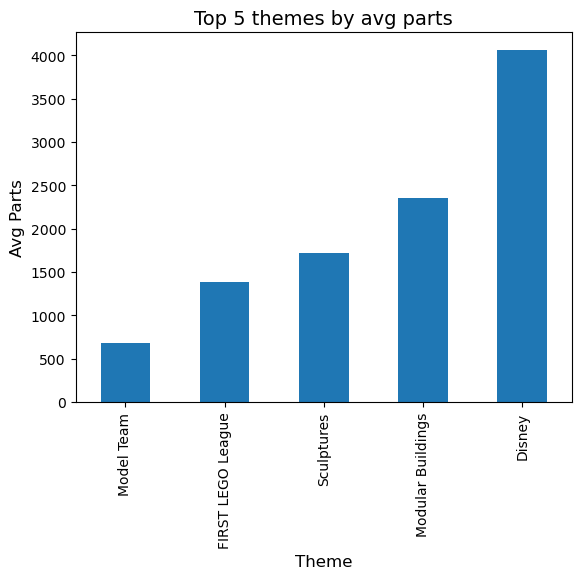

In [ ]:
# Merge sets and themes
marged = set.merge(theme, left_on="theme_id",right_on="id")

avg=marged.groupby("name_y")['num_parts'].mean().sort_values()

# Top/bottom 5
print("Top 5 themes by avg parts:")
print(avg.tail(5))
print("Bottom 5 themes by avg parts:")
print(avg.head(5))


# Now we have to plot the data with bar chart
import matplotlib.pyplot as plt
avg.tail(5).plot(kind='bar')
plt.title('Top 5 themes by avg parts', fontsize=14)
plt.xlabel('Theme', fontsize=12)
plt.ylabel('Avg Parts',fontsize=12)
plt.show()

# Task 4
##### Yearly Release Trends of Licensed vs. Non-Licensed Sets
###### Count the number of licensed and non-licensed sets released per year. Visualize annual trends.

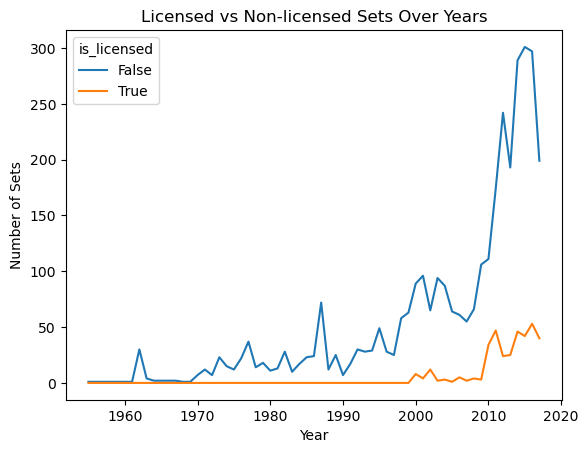

In [110]:
merged = set.merge(theme, left_on='theme_id', right_on='id')

trend = merged.groupby(['year', 'is_licensed']).size().unstack(fill_value=0)

# Plot
trend.plot(kind='line', title='Licensed vs Non-licensed Sets Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.show()

## Task 5
#####  Largest and Smallest Sets by Theme
###### For every theme, find the set with the maximum and minimum parts.

In [114]:
# Merge for theme info
merged = set.merge(theme, left_on='theme_id', right_on='id')

# Prepare largest set per theme
max_set = merged.loc[merged.groupby('name_y')['num_parts'].idxmax()]
max_set = max_set[['name_y', 'name_x', 'year', 'num_parts']]
max_set = max_set.rename(columns={
    'name_y': 'Theme',
    'name_x': 'Largest Set Name',
    'year': 'Largest Set Year',
    'num_parts': 'Largest Set Parts'
})

# Prepare smallest set per theme
min_set = merged.loc[merged.groupby('name_y')['num_parts'].idxmin()]
min_set = min_set[['name_y', 'name_x', 'year', 'num_parts']]
min_set = min_set.rename(columns={
    'name_y': 'Theme',
    'name_x': 'Smallest Set Name',
    'year': 'Smallest Set Year',
    'num_parts': 'Smallest Set Parts'
})

# Merge results into one summary table
result = pd.merge(max_set, min_set, on='Theme')
print(result.head())


          Theme                  Largest Set Name  Largest Set Year  \
0     4 Juniors          Picture Frame and Mirror              1980   
1        Agents  Mission 6: Mobile Command Center              2008   
2    Alpha Team               Ogel Control Center              2001   
3   Angry Birds                 King Pig’s Castle              2016   
4  Architecture                       Robie House              2011   

   Largest Set Parts                                  Smallest Set Name  \
0                 48                           Picture Frame and Mirror   
1               1153                               Gold Tooth's Getaway   
2                414                               Ogel Command Striker   
3                854                                   Piggy Car Escape   
4               2276  2 x 4 Plates - Blue (architectural hobby und m...   

   Smallest Set Year  Smallest Set Parts  
0               1980                  48  
1               2009                